# 1. Load the dataset (X and Y vector)

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd
import seaborn as sns 

DATASET_PATH = '../data/Fish_Dataset/Fish_Dataset/'

/Users/mat/miniconda3/envs/tf-2.0/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def get_labels():
    folders = os.listdir(DATASET_PATH)
    labels = []
    for f in folders:
        if not('.m' in f) and not('.txt' in f):
            labels.append(f)
    labels = np.array(labels)
    return labels


def get_X_Y(labels):
    # Get the images for each label
    img_shape = (128, 128) #resizing images to this shape ( after converting color image to gray image)
    n_sample_per_class = 600 #Keep only this number of samples per class (expensive complexity issue)
    nb_img = n_sample_per_class*len(labels) #1000 images per class

    X = np.zeros((nb_img, img_shape[0]*img_shape[1])) # feature matrix
    Y = np.zeros(nb_img) #labels vector
    for i in range(len(labels)):
        folder = os.path.join(DATASET_PATH, labels[i], labels[i])
        images = os.listdir(folder)
        np.random.shuffle(images)
        for j in range(n_sample_per_class):
            img_path = os.path.join(folder, images[j])
            img = cv2.imread(img_path, 0) #Load the gray image
            #Resizing
            img = cv2.resize(src=img, dsize=img_shape)
            #Normalization
            img = img/255
            #Add the image in the feature matrix and its labels to the label vector
            X[i*n_sample_per_class+j, :] = img.flatten()
            Y[i*n_sample_per_class+j] = np.argwhere(labels==labels[i])[0]
    return X, Y

labels = get_labels()
X, Y = get_X_Y(labels)
print("Feature matrix : \n", X)
print("Label vector : \n", Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

Feature matrix : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Label vector : 
 [0. 0. 0. ... 8. 8. 8.]


# 2. Pipelines

In [3]:
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
# Models import
# Scoring
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
# PCA
from sklearn.decomposition import PCA

In [4]:
pca = PCA()
set_config(display="diagram")
n_components = [50]

## 2.1 SVM pipeline

In [5]:
from sklearn.svm import SVC

svm_pipe = Pipeline(steps=[('pca', pca), ('svm', SVC(random_state=42))])
svm_params_grid = {
    # 'svm__kernel': ['linear', 'rbf'],
    # 'svm__gamma': [0.001, 0.0001],
    'pca__n_components': n_components,
}
svm_grid_search = GridSearchCV(estimator=svm_pipe, param_grid=svm_params_grid, scoring='accuracy', cv=10)
svm_pipe

Pipeline(steps=[('pca', PCA()), ('svm', SVC(random_state=42))])

## 2.2 Decision Tree pipeline

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt_pipe = Pipeline(steps=[('pca', pca), ('dt', DecisionTreeClassifier(random_state=42))])
dt_params_grid = {
    # 'dt__criterion': ["gini", "entropy"],
    # 'dt__max_depth': [2,4,6],
    'pca__n_components': n_components,
}
dt_grid_search = GridSearchCV(estimator=dt_pipe, param_grid=dt_params_grid, scoring='accuracy', cv=10)
dt_pipe

Pipeline(steps=[('pca', PCA()),
                ('dt', DecisionTreeClassifier(random_state=42))])

## 2.3 K-Neighbors pipeline

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipe = Pipeline(steps=[('pca', pca), ('knn', KNeighborsClassifier())])
knn_params_grid = {
    # 'knn__n_neighbors': [1, 2, 3],
    # 'knn__weights': ['uniform', 'distance'],
    # 'knn__metric': ['euclidean', 'manhattan'],
    'pca__n_components': n_components,
}
knn_grid_search = GridSearchCV(estimator=knn_pipe, param_grid=knn_params_grid, scoring='accuracy', cv=10)
knn_pipe

Pipeline(steps=[('pca', PCA()), ('knn', KNeighborsClassifier())])

## 2.4 Logistic regression pipeline

In [8]:
from sklearn.linear_model import LogisticRegression

lr_pipe = Pipeline(steps=[('pca', pca), ('lr', LogisticRegression(random_state=42))])
lr_params_grid = {
    # 'lr__penalty': ['l1', 'l2'],
    # 'lr__C': [1.0, 0.5, 0.1],
    # 'lr__solver': ['liblinear'],
    'pca__n_components': n_components,
}
lr_grid_search = GridSearchCV(estimator=lr_pipe, param_grid=lr_params_grid, scoring='accuracy', cv=10)
lr_pipe

Pipeline(steps=[('pca', PCA()), ('lr', LogisticRegression(random_state=42))])

## 2.5 Random forest pipeline

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_pipe = Pipeline(steps=[('pca', pca), ('rf', RandomForestClassifier(random_state=42))])
rf_params_grid = {
    # 'rf__min_samples_leaf': [1, 2, 3],
    # 'rf__max_depth': [1, 2, 3],
    # 'rf__min_samples_split': [2, 3],
    'pca__n_components': n_components,
}
rf_grid_search = GridSearchCV(estimator=rf_pipe, param_grid=rf_params_grid, scoring='accuracy', cv=10)
rf_pipe

Pipeline(steps=[('pca', PCA()), ('rf', RandomForestClassifier())])

## 2.6 XGB Classifier

In [10]:
from xgboost import XGBClassifier

xgb_pipe = Pipeline(steps=[('pca', pca), ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'))])
xgb_params_grid = {
    # 'xgb__learning_rate': [.1,.2,.3],
    # 'xgb__max_depth': [1, 2, 3],
    # 'xgb__min_child_weight': [3, 4, 5, 6],
    # 'xgb__subsample': [1.0, 0.5, 0.1],
    # 'xgb__n_estimators': [50,100,150],
    'pca__n_components': n_components,
}
xgb_grid_search = GridSearchCV(estimator=xgb_pipe, param_grid=xgb_params_grid, scoring='accuracy', cv=10)
xgb_pipe

/Users/mat/miniconda3/envs/tf-2.0/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Pipeline(steps=[('pca', PCA()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, enable_categorical=False,
                               eval_metric='mlogloss', gamma=None, gpu_id=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_delta_step=None, max_depth=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=42, reg_alpha=None,
                               reg_lambda=None, scale_pos_weight=None,
                               subsample=None, tree_method=None,
                               use_label_encoder=False,
                               validate_parameters=None, verbosity=None))])

## 2.7 Running the pipelines

Fitting model SVM 1 time(s)...
Fitting model Decision Tree 1 time(s)...
Fitting model K-Nearest Neighbors 1 time(s)...
Fitting model Linear Regression 1 time(s)...


/Users/mat/miniconda3/envs/tf-2.0/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mat/miniconda3/envs/tf-2.0/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Fitting model Random Forest 1 time(s)...
Fitting model XGB 1 time(s)...
SVM Test Accuracy: 0.8103703703703704
------------------------------
Decision Tree Test Accuracy: 0.6148148148148148
------------------------------
K-Nearest Neighbors Test Accuracy: 0.794074074074074
------------------------------
Linear Regression Test Accuracy: 0.5392592592592592
------------------------------
Random Forest Test Accuracy: 0.8422222222222222
------------------------------
XGB Test Accuracy: 0.8555555555555555
------------------------------


<BarContainer object of 6 artists>

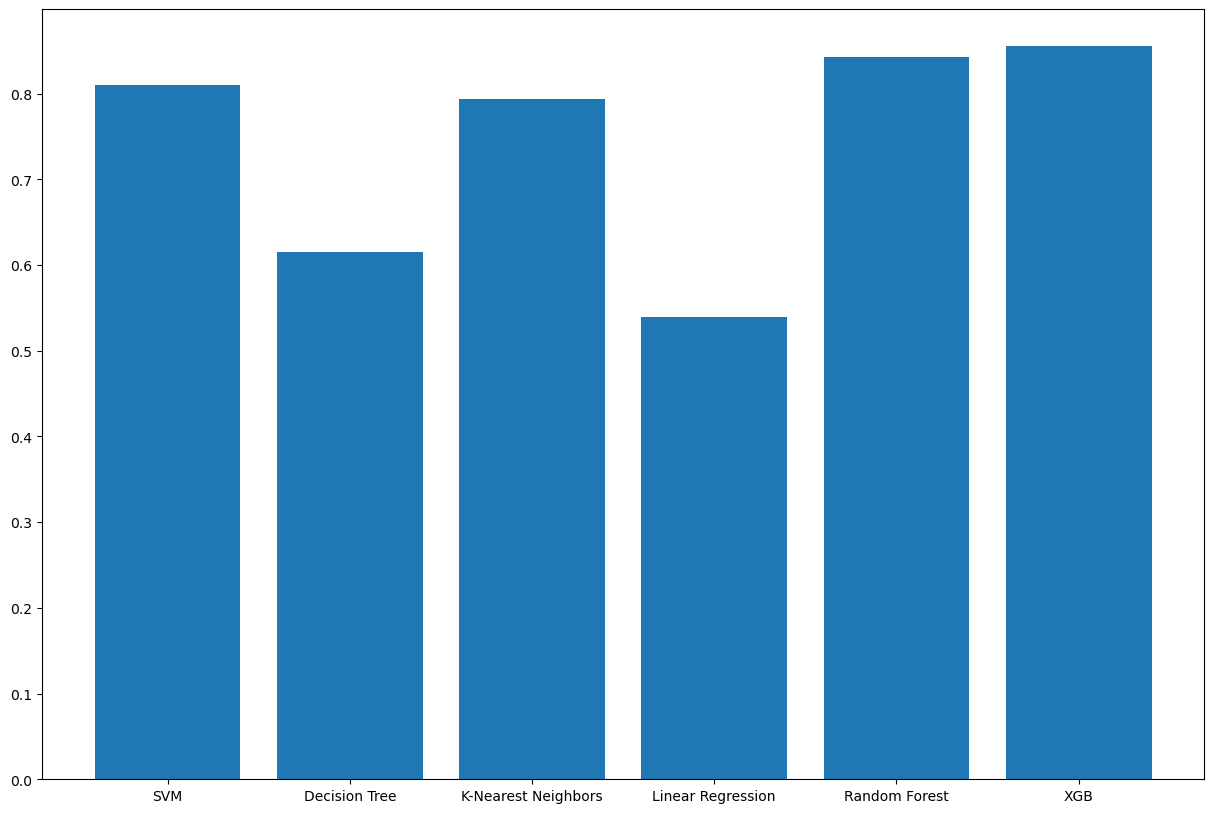

In [11]:
param_grids = [svm_params_grid, dt_params_grid, knn_params_grid, lr_params_grid, rf_params_grid, xgb_params_grid]
grids = [svm_grid_search, dt_grid_search, knn_grid_search, lr_grid_search, rf_grid_search, xgb_grid_search]
model_names = ['SVM', 'Decision Tree', 'K-Nearest Neighbors', 'Linear Regression', 'Random Forest', 'XGB']
for i, pipe in enumerate(grids):
    itterations = 1
    for param in param_grids[i].values():
        itterations *= len(param)
    print('Fitting model {} {} time(s)...'.format(model_names[i], itterations))
    pipe.fit(X_train, y_train)

results = []
for i, pipe in enumerate(grids):
    score = pipe.score(X_test,y_test)
    print('{} Test Accuracy: {}'.format(model_names[i], score))
    # Saving the best model for later fine tunning and evaluations
    results.append(score)
    print('---'*10)

plt.figure(figsize=(15,10))
plt.bar(model_names, results)

# 3. Evaluating the best models

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

def get_best_grids(grids, amount=2):
    return sorted(grids, key=lambda grid: grid.score(X_test,y_test), reverse=True)[:amount]

best_grids = get_best_grids(grids)
grid_tuples = []
for grid in best_grids:
    grid_tuples.append((grid, grid.predict(X_test), grid.predict_proba(X_test)))

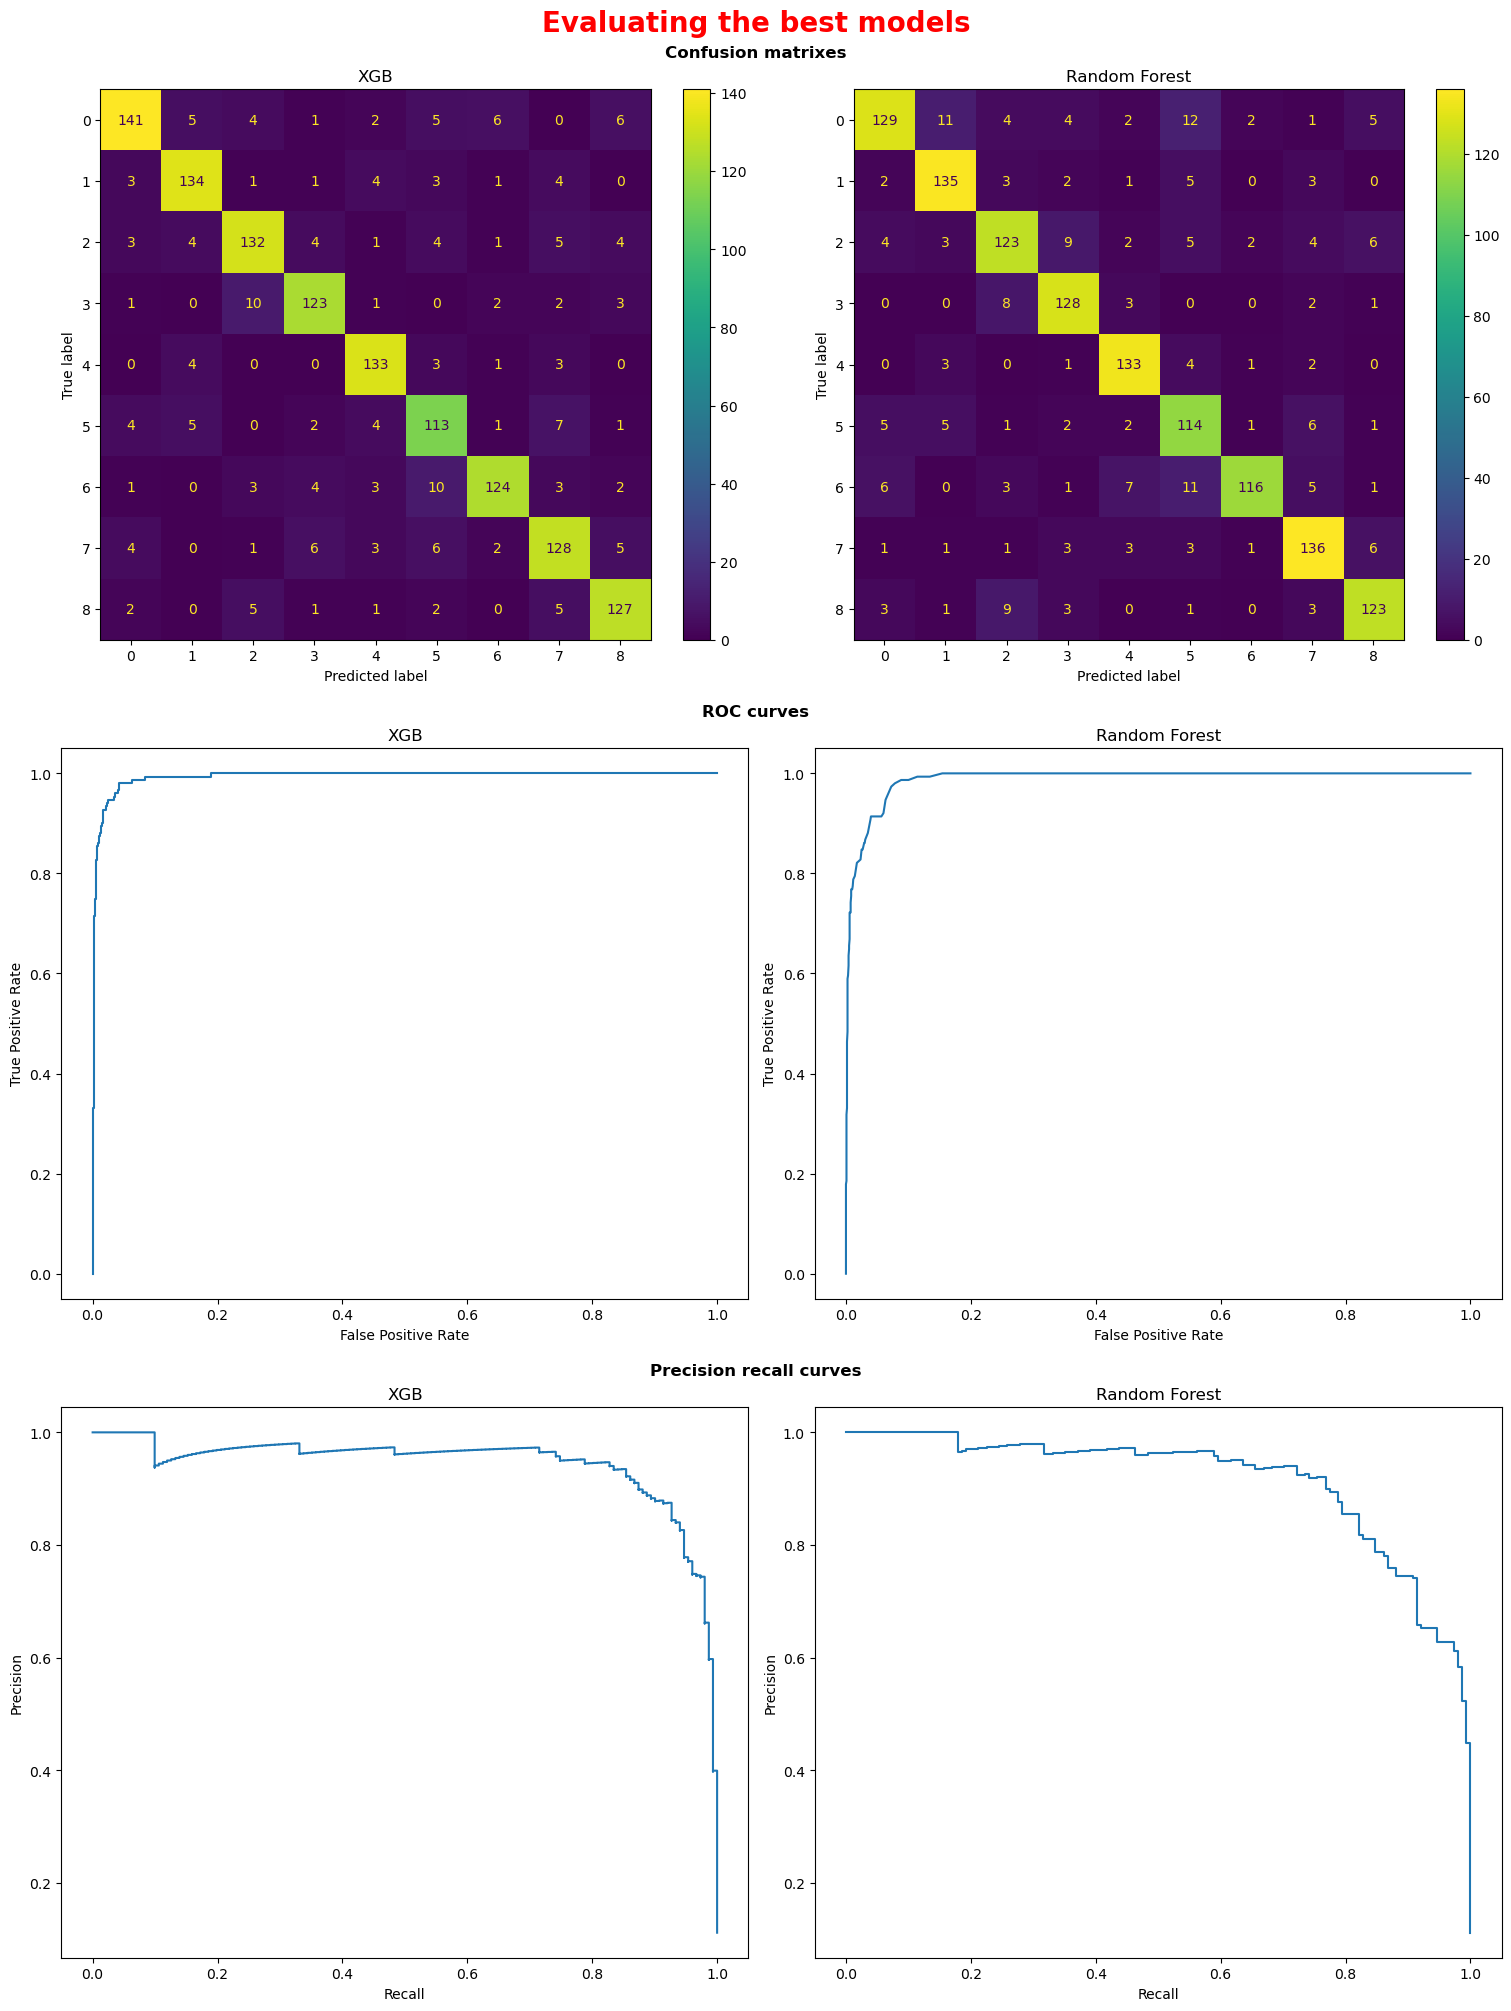

In [13]:
def plot_confusion_matrixes(axs, grid_tuples):
    for i, grid_tuple in enumerate(grid_tuples):
        cm = confusion_matrix(y_test, grid_tuple[1])
        cm_display = ConfusionMatrixDisplay(cm)
        cm_display.plot(ax=axs[i]) 
        cm_display.ax_.set_title(model_names[grids.index(grid_tuple[0])])

def plot_roc_curves(axs, grid_tuples):
    for i, grid_tuple in enumerate(grid_tuples):
        fpr, tpr, thresholds = roc_curve(y_test, grid_tuple[2][:, 1], pos_label=1)
        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
        roc_display.plot(ax=axs[i]) 
        roc_display.ax_.set_title(model_names[grids.index(grid_tuple[0])])

def plot_precision_recall_curves(axs, grid_tuples):
    for i, grid_tuple in enumerate(grid_tuples):
        prec, recall, thresholds = precision_recall_curve(y_test, grid_tuple[2][:, 1], pos_label=1)
        pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)
        pr_display.plot(ax=axs[i]) 
        pr_display.ax_.set_title(model_names[grids.index(grid_tuple[0])])


subfigures_titles = ['Confusion matrixes', 'ROC curves', 'Precision recall curves']
subplot_funcs = [plot_confusion_matrixes, plot_roc_curves, plot_precision_recall_curves]


fig = plt.figure(constrained_layout=True, figsize=(15, 20))
fig.suptitle('Evaluating the best models', fontweight='bold', size=20, color='red')

# create 3x1 subfigs
subfigs = fig.subfigures(nrows=3, ncols=1)
for row, subfig in enumerate(subfigs):
    subfig.suptitle(subfigures_titles[row], fontweight='semibold')

    # create 1x2 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=2)
    subplot_funcs[row](axs, grid_tuples)